
### Business case Introduction

**Cars24** is one of the leading used-car buying and selling platform in India. 

#### Current methodology to estimate the selling price has three major components
1. Past records of the "Selling Prices" of the same _Make_ and _Model_
2. Rule based calculations for the depreciation of the car
2. Rule based calculation for condition of the vehicle

As the **Pricing Data Scientist working at Cars24, you are given a task**

### GOAL: To automate the process of estimating price of the used car




## EDA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('train-cars24-car-price.csv')
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


we observe that full_name feature contains both Maker's and  Model name info.

In [13]:
df.shape

(13986, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          13986 non-null  object 
 1   selling_price      13986 non-null  float64
 2   year               13986 non-null  float64
 3   seller_type        13986 non-null  object 
 4   km_driven          13986 non-null  int64  
 5   fuel_type          13986 non-null  object 
 6   transmission_type  13986 non-null  object 
 7   mileage            13986 non-null  float64
 8   engine             13986 non-null  float64
 9   max_power          13986 non-null  float64
 10  seats              13986 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [15]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.377749,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242
std,9.368596,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


- `selling_price` ranges from [0.33, 395] - the values seem to be in lakhs.
- `mileage` min is 0, max is 120 - need to check for outliers.
- `engine` min is 0, max is 6752 - values appear to be in "cc" - need to check for outliers.

### Distributions

Lets check the distributions of these features one by one

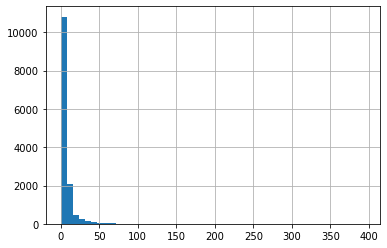

In [18]:
df['selling_price'].hist(bins=50)

Lets check the percntage of outliers. We are manually taking a call that price over a 100 lakhs (1 crorre) is an outlier by looking at the above plot

In [30]:
(df.loc[df.selling_price > 100].shape[0]/len(df))*100

0.06435006435006435

The population is so small so lets saturated the price at 100

In [31]:
df.loc[df['selling_price'] > 100, 'selling_price'] = 100

### Outliers and missing values

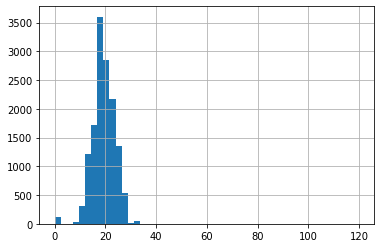

In [34]:
df['mileage'].hist(bins=50)

#### Another useful visualization is 'density plot', it  tries to fit the distribution over the histogram

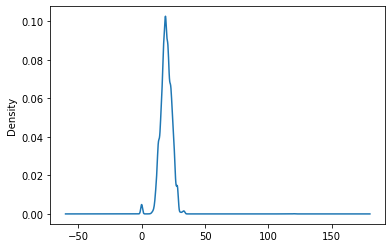

In [36]:
df['mileage'].plot.density()

#### The distribution is right skewed, and it seems that the mileage > 40 is just Outliers.

#### Another observation is we see peak around 0, So let's investigate this further.

In [43]:
# looking a pts where mileage < 5

df.loc[df['mileage'] < 5]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
271,Hyundai Santro GLS I - Euro II,0.35,2002.0,Individual,60000,Petrol,Manual,0.0,999.000000,5.00,5.0
333,Hyundai Terracan CRDi,2.85,2004.0,Dealer,84000,Diesel,Manual,0.0,2902.000000,5.00,5.0
459,Hyundai Santro Xing XL,1.20,2006.0,Dealer,78523,Petrol,Manual,0.0,1086.000000,5.00,5.0
595,Toyota Qualis GS G9,1.80,2001.0,Individual,257000,Diesel,Manual,0.0,2446.000000,5.00,8.0
752,Hyundai Santro Xing GL,0.95,2008.0,Dealer,85000,Petrol,Manual,0.0,1086.000000,62.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...
13238,Mahindra E Verito D2,11.97,2019.0,Individual,18281,Electric,Automatic,0.0,72.000000,41.57,5.0
13351,Hyundai Santro Xing XL,0.90,2006.0,Individual,120000,Petrol,Manual,0.0,1086.000000,5.00,5.0
13415,Mahindra E Verito D2,9.45,2020.0,Dealer,2746,Electric,Automatic,0.0,72.000000,41.57,5.0
13681,Nissan Infiniti Petrol,38.00,2014.0,Dealer,8000,Petrol,Manual,0.0,1476.327401,5.00,5.0


In [46]:
# there are just 119 rows, and it does not make any sense to have cars milegae < 5. 
# lets check on the % of such cars in our population.

(df.loc[df['mileage'] < 5].shape[0]/len(df))* 100


0.8508508508508509

In [47]:
# 8% of such rows we can either drop or impute these features during pre-processing.

#### Are the top values enormous, checking for cars mileage > 40

In [50]:
df[df['mileage'] > 40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
4291,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0
4751,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
4894,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0


In [51]:
df[df['mileage'] > 40].fuel_type.value_counts()

Electric    3
Name: fuel_type, dtype: int64

#### We have only EV vehicles with mileage > 40 and it make sense also.
#### So these are not incorrect values, let us not remove these values.

## Correlations

#### Let us check how features are related to each other.

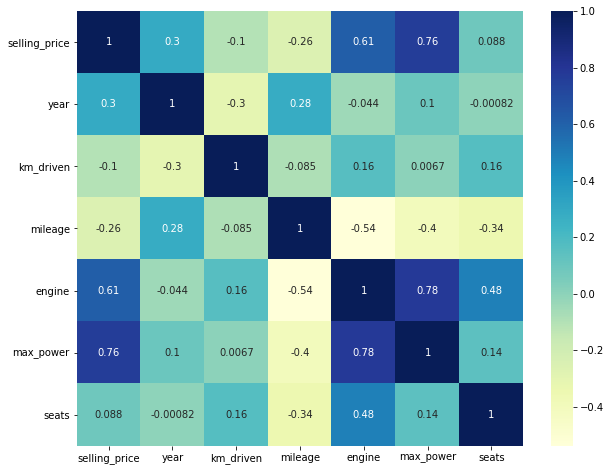

In [57]:
plt.figure(figsize= (10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

We see the following correlations:
- Engine and max-power
- Max power and selling price
Now based on our **domain knowledge** (about cars) we can digest these correlations. In this case, these correlations seem to make a lot of sense


Another visualisation we can check, is the scatter plot of each feature with the target. This can be easily done using pairplot from seaborn library

## Catogorical Features

We have noticed that the name contains the informaiton of the brand and the model. Lets extract those and create new features from them. After that we can drop the original column

In [67]:
df['make'] = df['full_name'].apply(lambda x: x.split()[0])
df['model'] = df['full_name'].apply(lambda x: ' '.join(x.split()[1:]))
df = df.drop("full_name", axis=1)
df.head(5)

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline


In [69]:
# Now let us look into some categorical features
df.describe(include='object')

,seller_type,fuel_type,transmission_type,make,model
count,13986,13986,13986,13986,13986
unique,3,5,2,41,2923
top,Dealer,Petrol,Manual,Maruti,Alto 800 LXI
freq,8393,6870,11251,3979,143


In [70]:
df['fuel_type'].value_counts()

Petrol      6870
Diesel      6823
CNG          233
LPG           49
Electric      11
Name: fuel_type, dtype: int64

In [71]:
df["transmission_type"].value_counts()

Manual       11251
Automatic     2735
Name: transmission_type, dtype: int64

In [72]:
df["seller_type"].value_counts()

Dealer              8393
Individual          5450
Trustmark Dealer     143
Name: seller_type, dtype: int64

#### Does selling varies in some of these groups, let try to find the relationship with Selling price

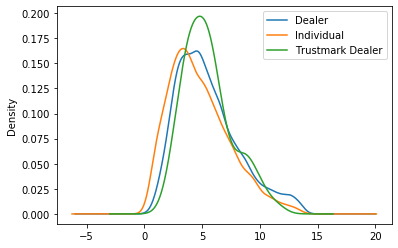

In [78]:
# We we took the distribution of these categorical in regards to the behavior with 0.90 percentile value
# of selling price within each group 

df.loc[df['selling_price'] <= df['selling_price'].quantile(.90)].groupby('seller_type')['selling_price'].plot.density()
plt.legend()

Looks like for different seller type, the selling price distrubution is not very different. Hence one intuition that can be developed from this plot is that the **seller_type** variable will not turn out to be very important for the ML model. (We will check this later)

#### Lets check for all groups?

Another way to visualise the same is to use a plot known as **box-plot**


Note: Although, `seats` is numeric, but we will consider it as an ordinal variable and perform similar analysis as we do for other categorical variables.

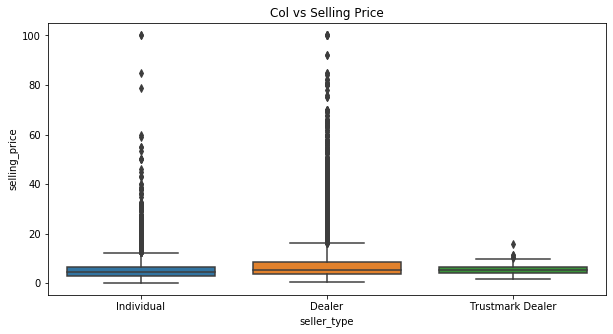

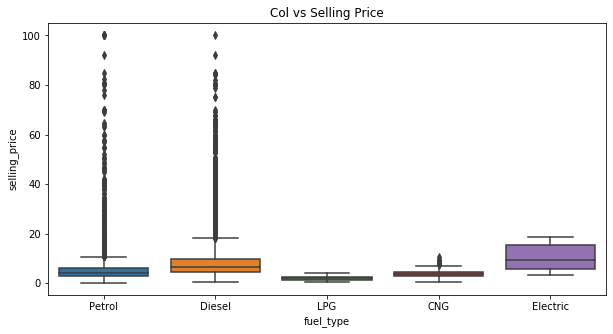

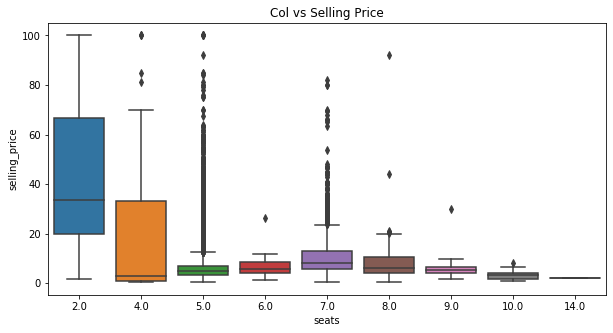

In [80]:
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='selling_price', x=col, data=df)
    plt.title('Col vs Selling Price')
    plt.show()

#### We can also transform the scale of selling-price for better visualisations

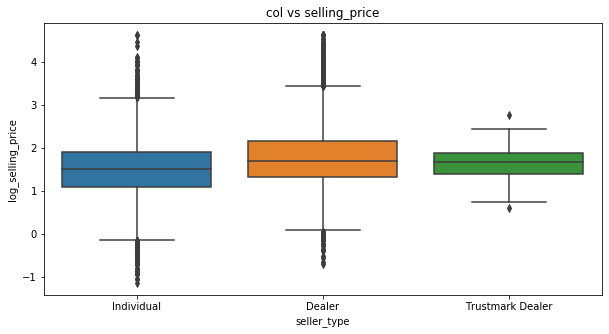

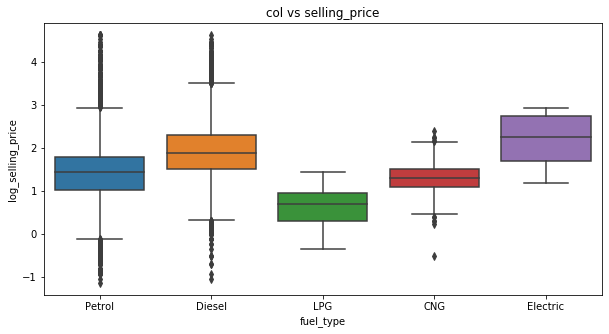

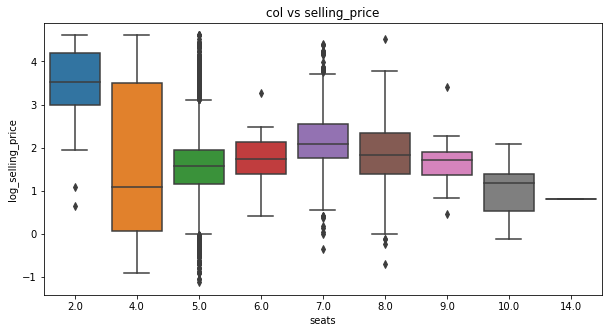

In [82]:
df['log_selling_price'] = np.log(df['selling_price'].values)

for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='log_selling_price',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

In [84]:
#### How many categories of "make" in the data?

len(df['make'].unique())

41

#### There are 41 car brands in the data - too many levels, think of possible ways to encode them as numbers
#### What are item counts for different "make"?

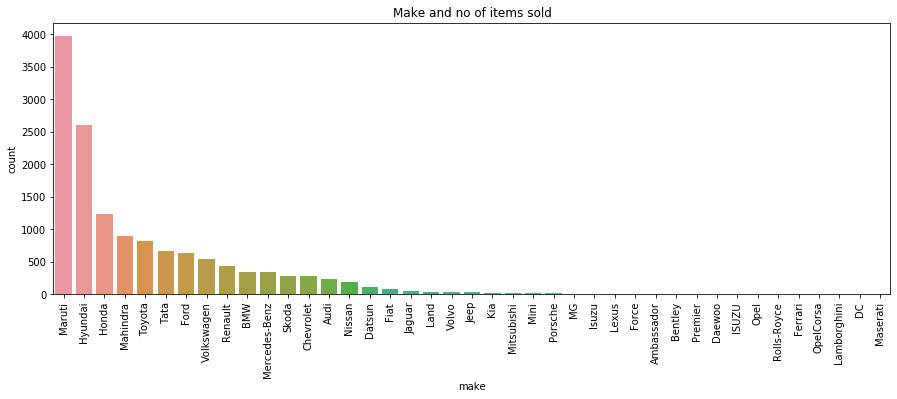

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
## df['make'].value_counts().index ----- here gives the list of Make as pandas indexes dtype
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

#### How is "make" related to the selling price?

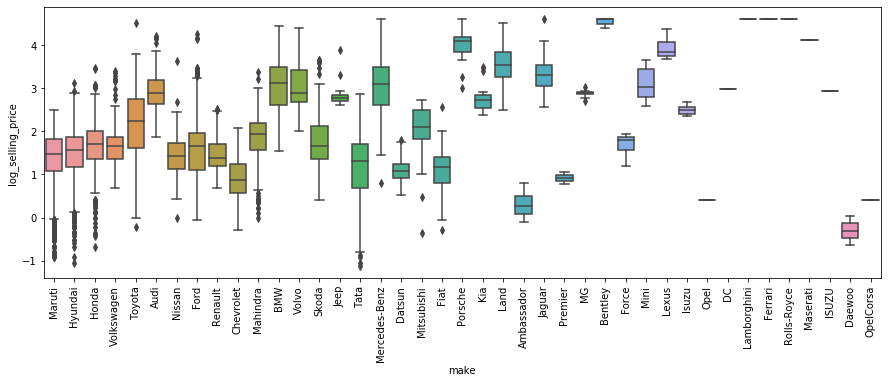

In [92]:
plt.figure(figsize=(15,5))
sns.boxplot(y='log_selling_price', x='make', data=df)
plt.xticks(rotation=90)
plt.title("Selling Price for different make")
plt.show()

#### lets drop the **log_selling_price** column for now

In [94]:
df.drop('log_selling_price',axis=1, inplace=True)

> - How should we treat number of seats? Continuous OR Categorical ?
> - **Answer**: 
> -- Number of seats is a variable with a finite discrete set of values. However it is orderd. If we make it categorical, it would be fed into the model as unordered. 
> --  But we need to think do we want that order? Example 2 seater cars are most likely more expensive than other cars. So in this sense 2 > 5. We actually would benefit from discarding the order.


> - Can you convert number of seats to a variable which has 9 unique values with 3 categories?
> - **Hint**: Merge some elements. Eg all cars with > 5 seats are on category.
> - Can we do something similar with the "make variable"

